In [1]:
## Title : UMAP LIF expression 
## Author : Eulalie Liorzou 

# LOAD LIBRARIES
library(Seurat)
library(SeuratDisk)
library(SingleR)
library(scuttle)
library(tidyverse)
library(dplyr)
library(purrr)
library(ggpubr)
library(ggh4x)



Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowA

In [11]:
# LIF EXPRESSION FOR THE 4 SPECIES


for (species in c("Marmoset","Macaque", "MousePseudopregnant", "Human")) {
  # Colors for conditions - in the end just one color if LIF counts are >1
  LIF_level_colors =  c("grey90","grey77","#5C366D","#5C366D","#5C366D","#5C366D","#5C366D")
  
  if (species =="MousePseudopregnant") {
    gene = "Lif"
    name = species
    sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
    DefaultAssay(object = sobj) = "RNA"
    
    # LIF expression by BIN
    # Grep all possible annotation for epithelial cells 
    Epithelial_Annot = unique(grep("^Epithe", sobj$Manual_annotation, value = TRUE))
    # Assigning the Level Epithelial to cells that are Epithelial but do not express LIF
    sobj$Epithelial_cells = ifelse(sobj$Manual_annotation %in% Epithelial_Annot,"Epithelial","Other_celltype")
    # Collecting normalised LIF expression for each cell
    sobj$LIF_expression = FetchData(sobj, vars = gene, slot = "data")
    
    # Binning LIF expression across cells by bin of 0 0-0.5 etc etc
    sobj$LIF_expression = cut(sobj$LIF_expression, breaks = c(-Inf,seq(0,5,by=1)))
    # Rename levels 
    LIF_levels = c("0", "0-1", "1-2", "2-3", "3-4", "4-5", "Other Cell Type")
    # Set levels 
    levels(sobj$LIF_expression) = LIF_levels
    # Reorder with Other cell types first 
    sobj$LIF_expression = relevel(sobj$LIF_expression, "Other Cell Type")

    # Attribute the level Other cell type to non epithelial cells
    sobj$LIF_expression[sobj$Epithelial_cells == "Other_celltype"] = "Other Cell Type"

    ## Setting colors by levels 

    # Assigning colors to the annotation
    anncolor = list(LIF_levels = LIF_level_colors)
    #Colors to factors  c("0", "0-1", "1-2", "2-3", "3-4", "4-5","Other_celltype")
    names(anncolor$LIF_levels) = levels(sobj$LIF_expression)

    # Plot LIF expression on UMAP 
    umap = DimPlot(sobj,reduction = "umap" ,group.by = "LIF_expression", cols =anncolor$LIF_levels,order = T, pt.size = 0.5)+ 
        NoLegend() + 
    ggtitle(paste0(name)) + 
    labs(y="", x="") + 
    theme(plot.title = element_text(size = 12, face = "bold"), 
          axis.line = element_blank(), 
          axis.text = element_blank(), 
          axis.ticks = element_blank()) 
    assign(paste0(name, "_sobj"), sobj)
    assign(paste0("UMAP_LIFexp_", name),umap)
      
  } else if (species =="Human") {
    gene = "LIF"
    name = species
    sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
    DefaultAssay(object = sobj) = "RNA"
    
    # LIF expression by BIN
    # Grep all possible annotation for epithelial cells 
    Epithelial_Annot = unique(grep("^Epithe", sobj$Manual_annotation, value = TRUE))
    # Assigning the Level Epithelial to cells that are Epithelial but do not express LIF
    sobj$Epithelial_cells = ifelse(sobj$Manual_annotation %in% Epithelial_Annot,"Epithelial","Other_celltype")
    # Collecting normalised LIF expression for each cell
    sobj$LIF_expression = FetchData(sobj, vars = gene, slot = "data")
    
    # Binning LIF expression across cells by bin of 0 0-0.5 etc etc
    sobj$LIF_expression = cut(sobj$LIF_expression, breaks = c(-Inf,seq(0,5,by=1)))
    # Rename levels 
    LIF_levels = c("0", "0-1", "1-2", "2-3", "3-4", "4-5", "Other Cell Type")
    # Set levels 
    levels(sobj$LIF_expression) = LIF_levels
    # Reorder with Other cell types first 
    sobj$LIF_expression = relevel(sobj$LIF_expression, "Other Cell Type")

    # Attribute the level Other cell type to non epithelial cells
    sobj$LIF_expression[sobj$Epithelial_cells == "Other_celltype"] = "Other Cell Type"

    ## Setting colors by levels 

    # Assigning colors to the annotation
    anncolor = list(LIF_levels = LIF_level_colors)
    #Colors to factors  c("0", "0-1", "1-2", "2-3", "3-4", "4-5","Other_celltype")
    names(anncolor$LIF_levels) = levels(sobj$LIF_expression)

    # Plot LIF expression on UMAP 
    umap = DimPlot(sobj,reduction = "umap_harmony" ,group.by = "LIF_expression", cols =anncolor$LIF_levels,order = T, pt.size = 0.5)+ 
        NoLegend() + 
    ggtitle(paste0(name)) + 
    labs(y="", x="") + 
    theme(plot.title = element_text(size = 12, face = "bold"), 
          axis.line = element_blank(), 
          axis.text = element_blank(), 
          axis.ticks = element_blank()) 
    assign(paste0(name, "_sobj"), sobj)
    assign(paste0("UMAP_LIFexp_", name),umap)
      
  } else {
        gene = "LIF" 
        name = species
        sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
        DefaultAssay(object = sobj) = "RNA"
        # LIF expression by BIN
        # Grep all possible annotation for epithelial cells 
        Epithelial_Annot = unique(grep("^Epithe", sobj$Manual_annotation, value = TRUE))
        # Assigning the Level Epithelial to cells that are Epithelial but do not express LIF
        sobj$Epithelial_cells = ifelse(sobj$Manual_annotation %in% Epithelial_Annot,"Epithelial","Other_celltype")
        # Collecting normalised LIF expression for each cell
        sobj$LIF_expression = FetchData(sobj, vars = gene, slot = "data")

        # Binning LIF expression across cells by bin of 0 0-0.5 etc etc
        sobj$LIF_expression = cut(sobj$LIF_expression, breaks = c(-Inf,seq(0,5,by=1)))
        # Rename levels 
        LIF_levels = c("0", "0-1", "1-2", "2-3", "3-4", "4-5", "Other Cell Type")
        # Set levels 
        levels(sobj$LIF_expression) = LIF_levels
        # Reorder with Other cell types first 
        sobj$LIF_expression = relevel(sobj$LIF_expression, "Other Cell Type")

        # Attribute the level Other cell type to non epithelial cells
        sobj$LIF_expression[sobj$Epithelial_cells == "Other_celltype"] = "Other Cell Type"

        ## Setting colors by levels 

        # Assigning colors to the annotation
        anncolor = list(LIF_levels = LIF_level_colors)
        #Colors to factors  c("0", "0-1", "1-2", "2-3", "3-4", "4-5","Other_celltype")
        names(anncolor$LIF_levels) = levels(sobj$LIF_expression)

        # Plot LIF expression on UMAP 
        umap = DimPlot(sobj,reduction = "umap" ,group.by = "LIF_expression", cols =anncolor$LIF_levels,order = T, pt.size = 0.5)+ 
            NoLegend() + 
        ggtitle(paste0(name)) + 
        labs(y="", x="") + 
        theme(plot.title = element_text(size = 12, face = "bold"), 
              axis.line = element_blank(), 
              axis.text = element_blank(), 
              axis.ticks = element_blank()) 
        assign(paste0(name, "_sobj"), sobj)
        assign(paste0("UMAP_LIFexp_", name),umap)
  }
  
}


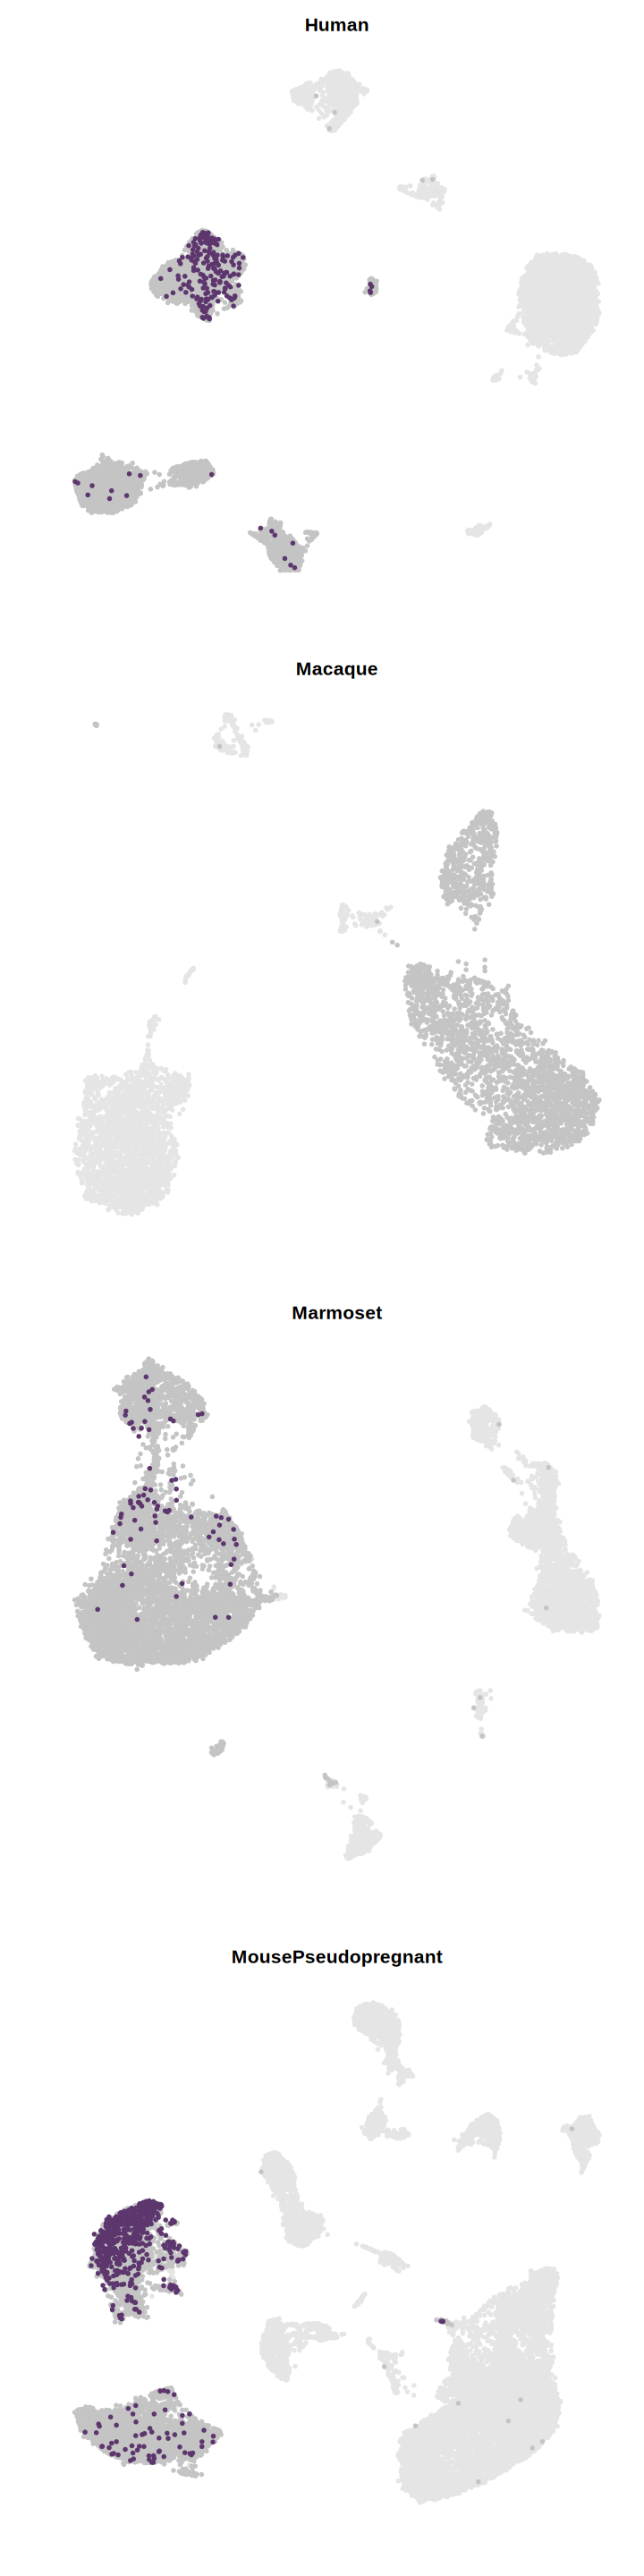

In [12]:
options(repr.plot.width=6, repr.plot.height=24)

# Plot LIF expression on UMAP by species 

ggarrange(UMAP_LIFexp_Human,UMAP_LIFexp_Macaque, UMAP_LIFexp_Marmoset,UMAP_LIFexp_MousePseudopregnant, ncol = 1, nrow = 4)

# Saving the UMAP 
ggsave("../../../figures/pieces/UMAP_LIF_vF.pdf", device = "pdf", width = 6, height = 24)


In [16]:
options(repr.plot.width=4, repr.plot.height=4)

UMAP_LIFexp_MousePseudopregnant
ggsave("../../../figures/pieces/UMAP_LIF_MousePseudopregnant.pdf", device = "pdf", width = 4, height = 4)


# LIF expression across all clusters 


In [5]:


for (species in c("Macaque","Marmoset","MousePseudopregnant", "Human")) {
  # Colors for conditions
  LIF_level_colors =  c("grey77","#5C366D","#5C366D","#5C366D","#5C366D","#5C366D")
  
  if (species =="MousePseudopregnant") {
    gene = "Lif"
    name = species
    sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
    DefaultAssay(object = sobj) = "RNA"
    
    # LIF expression by BIN
    sobj$LIF_expression = FetchData(sobj, vars = gene, slot = "data")
    
    # Binning LIF expression across cells by bin of 0 0-0.5 etc etc
    sobj$LIF_expression = cut(sobj$LIF_expression, breaks = c(-Inf,seq(0,5,by=1)))
    # Rename levels 
    LIF_levels = c("0", "0-1", "1-2", "2-3", "3-4", "4-5")
    # Set levels 
    levels(sobj$LIF_expression) = LIF_levels

    ## Setting colors by levels 

    # Assigning colors to the annotation
    anncolor = list(LIF_levels = LIF_level_colors)
    #Colors to factors  c("0", "0-1", "1-2", "2-3", "3-4", "4-5","Other_celltype")
    names(anncolor$LIF_levels) = levels(sobj$LIF_expression)

    # Plot LIF expression on UMAP 
    umap = DimPlot(sobj,reduction = "umap" ,group.by = "LIF_expression", cols =anncolor$LIF_levels,order = TRUE, pt.size = 0.5)+ 
    #NoLegend() + 
    ggtitle(paste0(name)) + 
    labs(y="", x="") + 
    theme(plot.title = element_text(size = 12, face = "bold"), 
      axis.line = element_blank(), 
      axis.text = element_blank(), 
      axis.ticks = element_blank()) +
    force_panelsizes(rows = unit(5.5, "cm"),
                 cols = unit(7, "cm"))
    assign(paste0(name, "_sobj"), sobj)
    assign(paste0("UMAP_LIFexp_all_", name),umap)
      
      
  }  else if (species =="Human") {
    gene = "LIF" 
    name = species
    sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
    DefaultAssay(object = sobj) = "RNA"
    
    # LIF expression by BIN
    sobj$LIF_expression = FetchData(sobj, vars = gene, slot = "data")
    
    # Binning LIF expression across cells by bin of 0 0-0.5 etc etc
    sobj$LIF_expression = cut(sobj$LIF_expression, breaks = c(-Inf,seq(0,5,by=1)))
    # Rename levels 
    LIF_levels = c("0", "0-1", "1-2", "2-3", "3-4", "4-5")
    # Set levels 
    levels(sobj$LIF_expression) = LIF_levels

    ## Setting colors by levels 

    # Assigning colors to the annotation
    anncolor = list(LIF_levels = LIF_level_colors)
    #Colors to factors  c("0", "0-1", "1-2", "2-3", "3-4", "4-5","Other_celltype")
    names(anncolor$LIF_levels) = levels(sobj$LIF_expression)

    # Plot LIF expression on UMAP 
    umap = DimPlot(sobj,reduction = "umap" ,group.by = "LIF_expression", cols =anncolor$LIF_levels,order = TRUE, pt.size = 0.5)+ 
    #NoLegend() + 
    ggtitle(paste0(name)) + 
    labs(y="", x="") + 
    theme(plot.title = element_text(size = 12, face = "bold"), 
          axis.line = element_blank(), 
          axis.text = element_blank(), 
          axis.ticks = element_blank()) +
    force_panelsizes(rows = unit(5.5, "cm"),
                     cols = unit(7, "cm"))
    assign(paste0(name, "_sobj"), sobj)
    assign(paste0("UMAP_LIFexp_all_", name),umap)
  } else {
    gene = "LIF" 
    name = species
    sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
    DefaultAssay(object = sobj) = "RNA"
    
    # LIF expression by BIN
    sobj$LIF_expression = FetchData(sobj, vars = gene, slot = "data")
    
    # Binning LIF expression across cells by bin of 0 0-0.5 etc etc
    sobj$LIF_expression = cut(sobj$LIF_expression, breaks = c(-Inf,seq(0,5,by=1)))
    # Rename levels 
    LIF_levels = c("0", "0-1", "1-2", "2-3", "3-4", "4-5")
    # Set levels 
    levels(sobj$LIF_expression) = LIF_levels

    ## Setting colors by levels 

    # Assigning colors to the annotation
    anncolor = list(LIF_levels = LIF_level_colors)
    #Colors to factors  c("0", "0-1", "1-2", "2-3", "3-4", "4-5","Other_celltype")
    names(anncolor$LIF_levels) = levels(sobj$LIF_expression)

    # Plot LIF expression on UMAP 
    umap = DimPlot(sobj,reduction = "umap" ,group.by = "LIF_expression", cols =anncolor$LIF_levels,order = TRUE, pt.size = 0.5)+ 
    #NoLegend() + 
    ggtitle(paste0(name)) + 
    labs(y="", x="") + 
    theme(plot.title = element_text(size = 12, face = "bold"), 
          axis.line = element_blank(), 
          axis.text = element_blank(), 
          axis.ticks = element_blank()) +
    force_panelsizes(rows = unit(5.5, "cm"),
                     cols = unit(7, "cm"))
    assign(paste0(name, "_sobj"), sobj)
    assign(paste0("UMAP_LIFexp_all_", name),umap)
  }
  
}



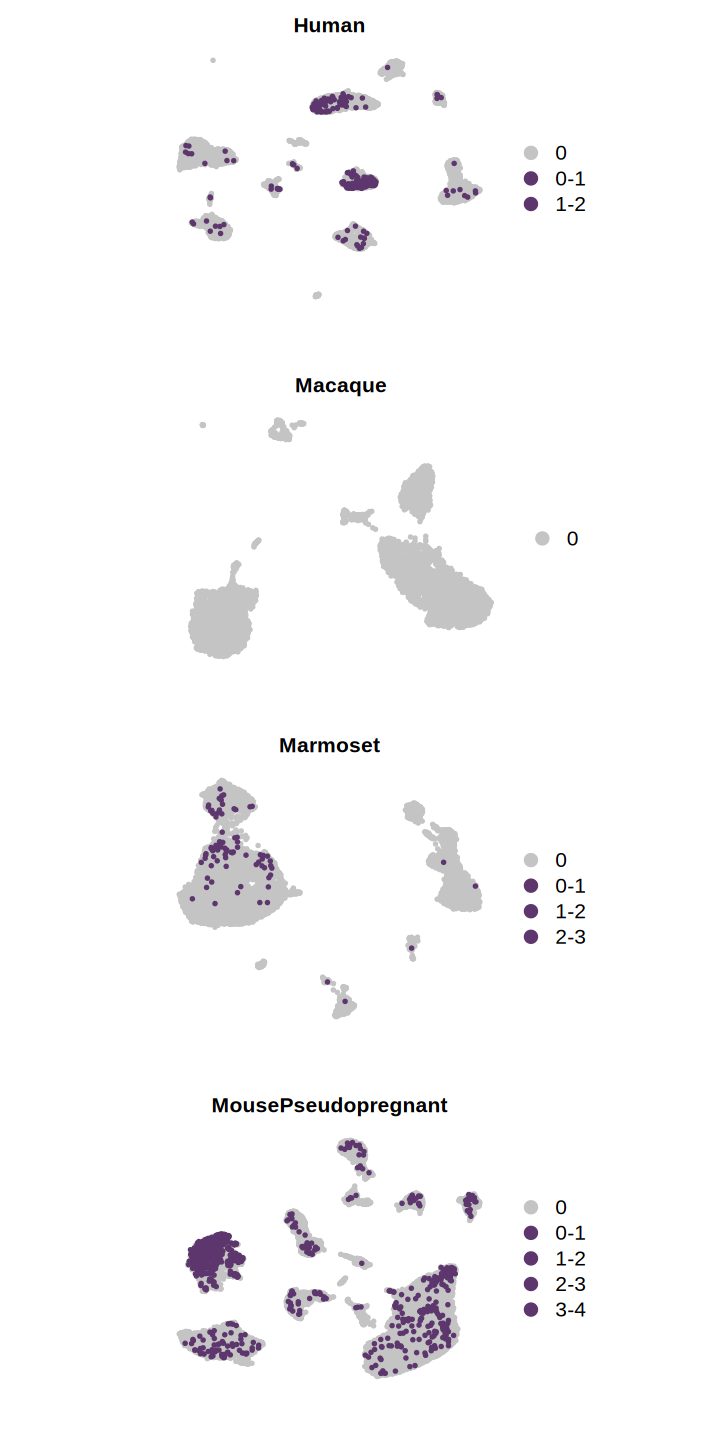

In [6]:
options(repr.plot.width=6, repr.plot.height=12)

# Plot LIF expression on UMAP by species 

ggarrange(UMAP_LIFexp_all_Human,UMAP_LIFexp_all_Macaque, UMAP_LIFexp_all_Marmoset,UMAP_LIFexp_all_MousePseudopregnant, ncol = 1, nrow = 4)

# Saving the UMAP 
ggsave("../../../figures/supplementary/Supp_UMAP_LIF_all_cell_types_VF.pdf", device = "pdf", width = 6, height = 12)


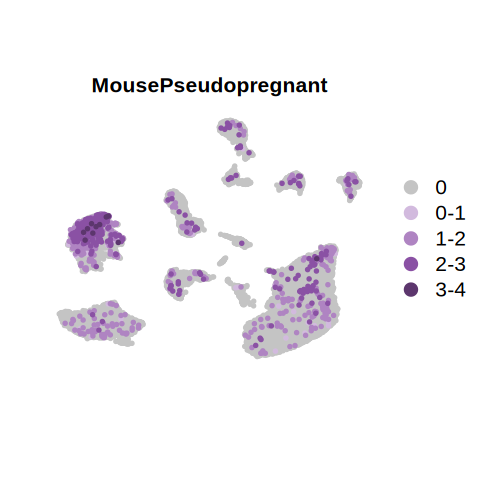

In [19]:
options(repr.plot.width=4, repr.plot.height=4)

# Save only for Mouse Pseudopregnant

UMAP_LIFexp_all_MousePseudopregnant

ggsave("../../../figures/supplementary/Supp_UMAP_LIF_all_cell_types_MousePseudopregnant.pdf", device = "pdf", width = 4, height = 4)


# B4GALNT2 

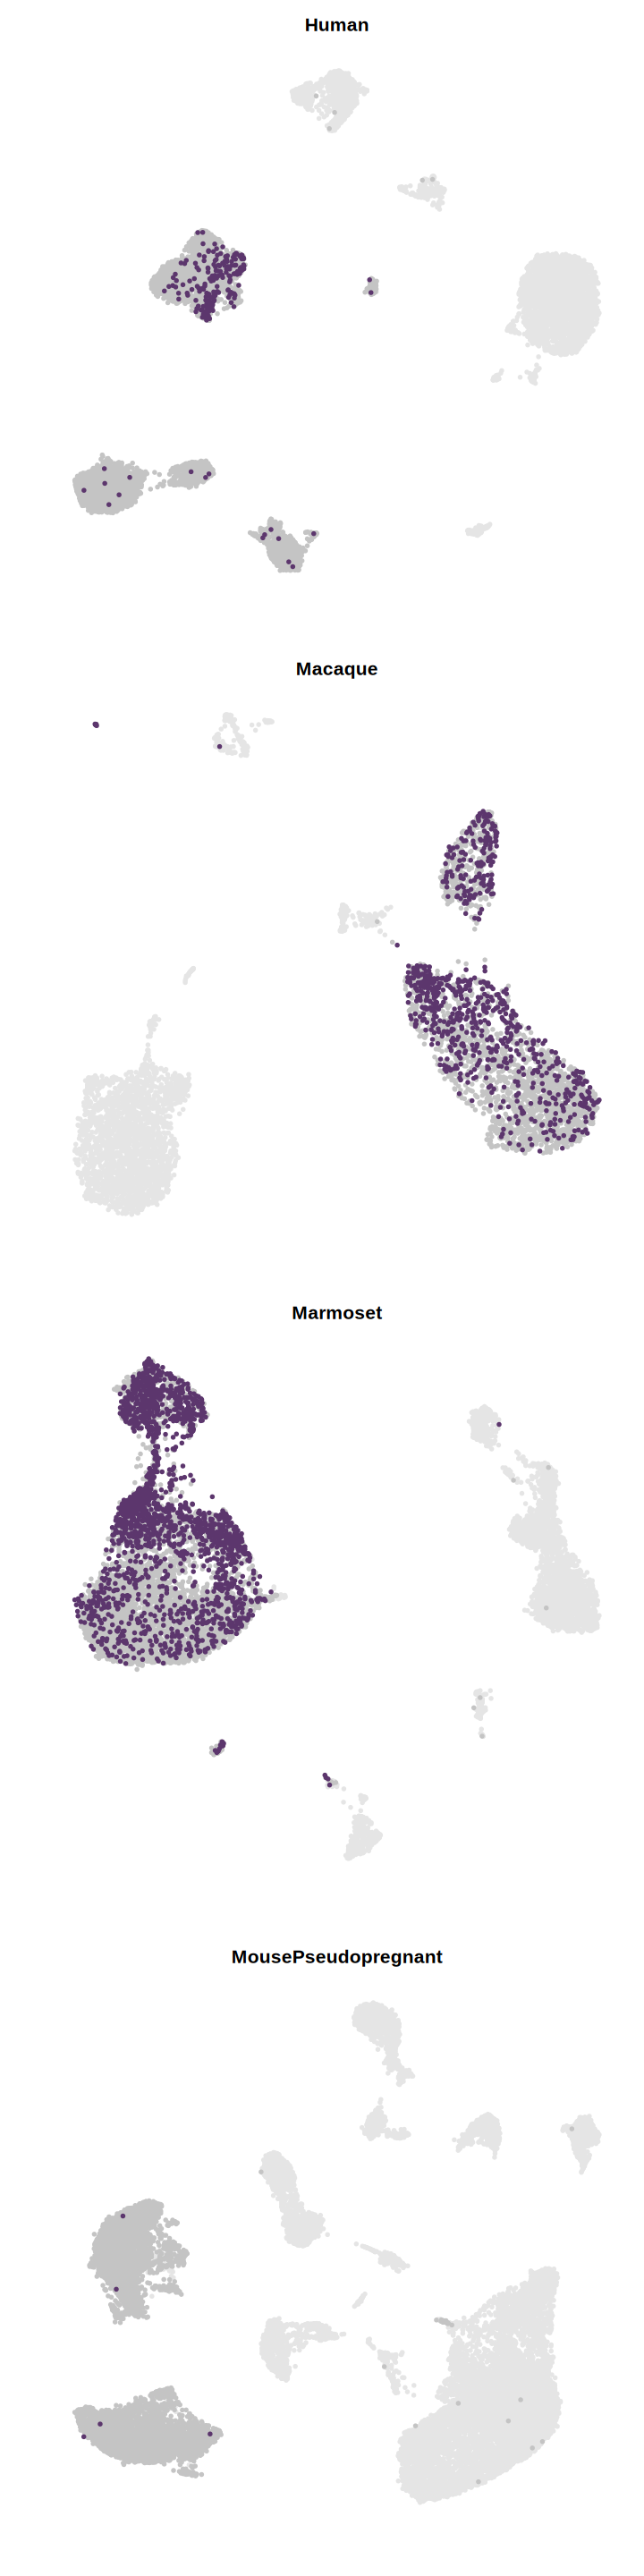

In [15]:
# Gene EXPRESSION FOR THE 4 SPECIES
mouse_genename = "B4galnt2"
genename = "B4GALNT2"

for (species in c("Marmoset","Macaque", "MousePseudopregnant", "Human")) {
  # Colors for conditions
  Gene_level_colors =  c("grey90","grey77","#5C366D","#5C366D","#5C366D","#5C366D","#5C366D")
  
  if (species =="MousePseudopregnant") {
    gene = mouse_genename
    name = species
    sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
    DefaultAssay(object = sobj) = "RNA"
    
    # Gene expression by BIN
    # Grep all possible annotation for epithelial cells 
    Epithelial_Annot = unique(grep("^Epithe", sobj$Manual_annotation, value = TRUE))
    # Assigning the Level Epithelial to cells that are Epithelial but do not express Gene
    sobj$Epithelial_cells = ifelse(sobj$Manual_annotation %in% Epithelial_Annot,"Epithelial","Other_celltype")
    # Collecting normalised Gene expression for each cell
    sobj$Gene_expression = FetchData(sobj, vars = gene, slot = "data")
    
    # Binning Gene expression across cells by bin of 0 0-0.5 etc etc
    sobj$Gene_expression = cut(sobj$Gene_expression, breaks = c(-Inf,seq(0,5,by=1)))
    # Rename levels 
    Gene_levels = c("0", "0-1", "1-2", "2-3", "3-4", "4-5", "Other Cell Type")
    # Set levels 
    levels(sobj$Gene_expression) = Gene_levels
    # Reorder with Other cell types first 
    sobj$Gene_expression = relevel(sobj$Gene_expression, "Other Cell Type")

    # Attribute the level Other cell type to non epithelial cells
    sobj$Gene_expression[sobj$Epithelial_cells == "Other_celltype"] = "Other Cell Type"

    ## Setting colors by levels 

    # Assigning colors to the annotation
    anncolor = list(Gene_levels = Gene_level_colors)
    #Colors to factors  c("0", "0-1", "1-2", "2-3", "3-4", "4-5","Other_celltype")
    names(anncolor$Gene_levels) = levels(sobj$Gene_expression)

    # Plot Gene expression on UMAP 
    umap = DimPlot(sobj,reduction = "umap" ,group.by = "Gene_expression", cols =anncolor$Gene_levels,order = T, pt.size = 0.5)+ 
        NoLegend() + 
    ggtitle(paste0(name)) + 
    labs(y="", x="") + 
    theme(plot.title = element_text(size = 12, face = "bold"), 
          axis.line = element_blank(), 
          axis.text = element_blank(), 
          axis.ticks = element_blank())
    assign(paste0(name, "_sobj"), sobj)
    assign(paste0("UMAP_Geneexp_", name),umap)
      
  } else if (species =="Human") {
    gene = genename
    name = species
    sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
    DefaultAssay(object = sobj) = "RNA"
    
    # Gene expression by BIN
    # Grep all possible annotation for epithelial cells 
    Epithelial_Annot = unique(grep("^Epithe", sobj$Manual_annotation, value = TRUE))
    # Assigning the Level Epithelial to cells that are Epithelial but do not express Gene
    sobj$Epithelial_cells = ifelse(sobj$Manual_annotation %in% Epithelial_Annot,"Epithelial","Other_celltype")
    # Collecting normalised Gene expression for each cell
    sobj$Gene_expression = FetchData(sobj, vars = gene, slot = "data")
    
    # Binning Gene expression across cells by bin of 0 0-0.5 etc etc
    sobj$Gene_expression = cut(sobj$Gene_expression, breaks = c(-Inf,seq(0,5,by=1)))
    # Rename levels 
    Gene_levels = c("0", "0-1", "1-2", "2-3", "3-4", "4-5", "Other Cell Type")
    # Set levels 
    levels(sobj$Gene_expression) = Gene_levels
    # Reorder with Other cell types first 
    sobj$Gene_expression = relevel(sobj$Gene_expression, "Other Cell Type")

    # Attribute the level Other cell type to non epithelial cells
    sobj$Gene_expression[sobj$Epithelial_cells == "Other_celltype"] = "Other Cell Type"

    ## Setting colors by levels 

    # Assigning colors to the annotation
    anncolor = list(Gene_levels = Gene_level_colors)
    #Colors to factors  c("0", "0-1", "1-2", "2-3", "3-4", "4-5","Other_celltype")
    names(anncolor$Gene_levels) = levels(sobj$Gene_expression)

    # Plot Gene expression on UMAP 
    umap = DimPlot(sobj,reduction = "umap_harmony" ,group.by = "Gene_expression", cols =anncolor$Gene_levels,order = T, pt.size = 0.5)+ 
        NoLegend() + 
    ggtitle(paste0(name)) + 
    labs(y="", x="") + 
    theme(plot.title = element_text(size = 12, face = "bold"), 
          axis.line = element_blank(), 
          axis.text = element_blank(), 
          axis.ticks = element_blank()) 
    assign(paste0(name, "_sobj"), sobj)
    assign(paste0("UMAP_Geneexp_", name),umap)
      
  } else {
        gene = genename
        name = species
        sobj = readRDS(file = paste0("../../../results/snRNA-seq/seuratobject/",species,"_processed.rds"))
        DefaultAssay(object = sobj) = "RNA"
        # Gene expression by BIN
        # Grep all possible annotation for epithelial cells 
        Epithelial_Annot = unique(grep("^Epithe", sobj$Manual_annotation, value = TRUE))
        # Assigning the Level Epithelial to cells that are Epithelial but do not express Gene
        sobj$Epithelial_cells = ifelse(sobj$Manual_annotation %in% Epithelial_Annot,"Epithelial","Other_celltype")
        # Collecting normalised Gene expression for each cell
        sobj$Gene_expression = FetchData(sobj, vars = gene, slot = "data")

        # Binning Gene expression across cells by bin of 0 0-0.5 etc etc
        sobj$Gene_expression = cut(sobj$Gene_expression, breaks = c(-Inf,seq(0,5,by=1)))
        # Rename levels 
        Gene_levels = c("0", "0-1", "1-2", "2-3", "3-4", "4-5", "Other Cell Type")
        # Set levels 
        levels(sobj$Gene_expression) = Gene_levels
        # Reorder with Other cell types first 
        sobj$Gene_expression = relevel(sobj$Gene_expression, "Other Cell Type")

        # Attribute the level Other cell type to non epithelial cells
        sobj$Gene_expression[sobj$Epithelial_cells == "Other_celltype"] = "Other Cell Type"

        ## Setting colors by levels 

        # Assigning colors to the annotation
        anncolor = list(Gene_levels = Gene_level_colors)
        #Colors to factors  c("0", "0-1", "1-2", "2-3", "3-4", "4-5","Other_celltype")
        names(anncolor$Gene_levels) = levels(sobj$Gene_expression)

        # Plot Gene expression on UMAP 
        umap = DimPlot(sobj,reduction = "umap" ,group.by = "Gene_expression", cols =anncolor$Gene_levels,order = T, pt.size = 0.5)+ 
            NoLegend() + 
        ggtitle(paste0(name)) + 
        labs(y="", x="") + 
        theme(plot.title = element_text(size = 12, face = "bold"), 
              axis.line = element_blank(), 
              axis.text = element_blank(), 
              axis.ticks = element_blank())
        assign(paste0(name, "_sobj"), sobj)
        assign(paste0("UMAP_Geneexp_", name),umap)
  }
  
}

options(repr.plot.width=6, repr.plot.height=24)

# Plot Gene expression on UMAP by species 

ggarrange(UMAP_Geneexp_Human, UMAP_Geneexp_Macaque, UMAP_Geneexp_Marmoset,UMAP_Geneexp_MousePseudopregnant, ncol = 1, nrow = 4)

# Saving the UMAP 
ggsave(paste0("../../../figures/pieces/UMAP_", genename, "_VF.pdf"), device = "pdf", width = 6, height = 24)
